#Problem 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sb.set()

In [ ]:
houseData = pd.read_csv("/content/drive/MyDrive/EE0005/LAB5/train.csv")
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


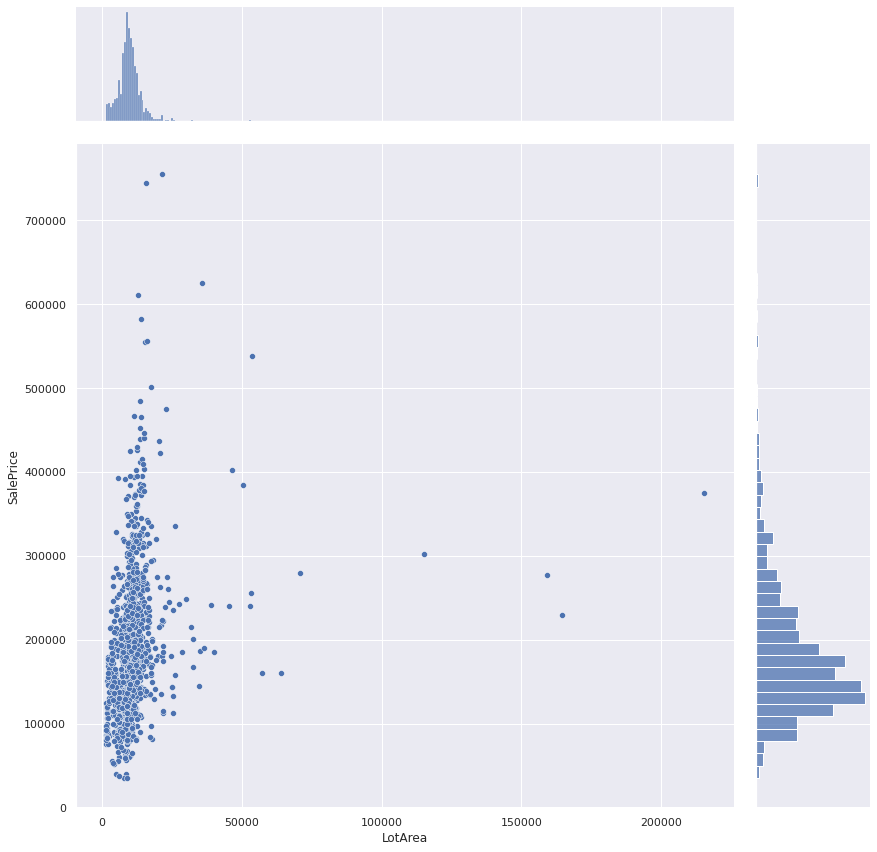

In [ ]:
sb.jointplot(data = houseData, x = 'LotArea', y = 'SalePrice', height = 12)

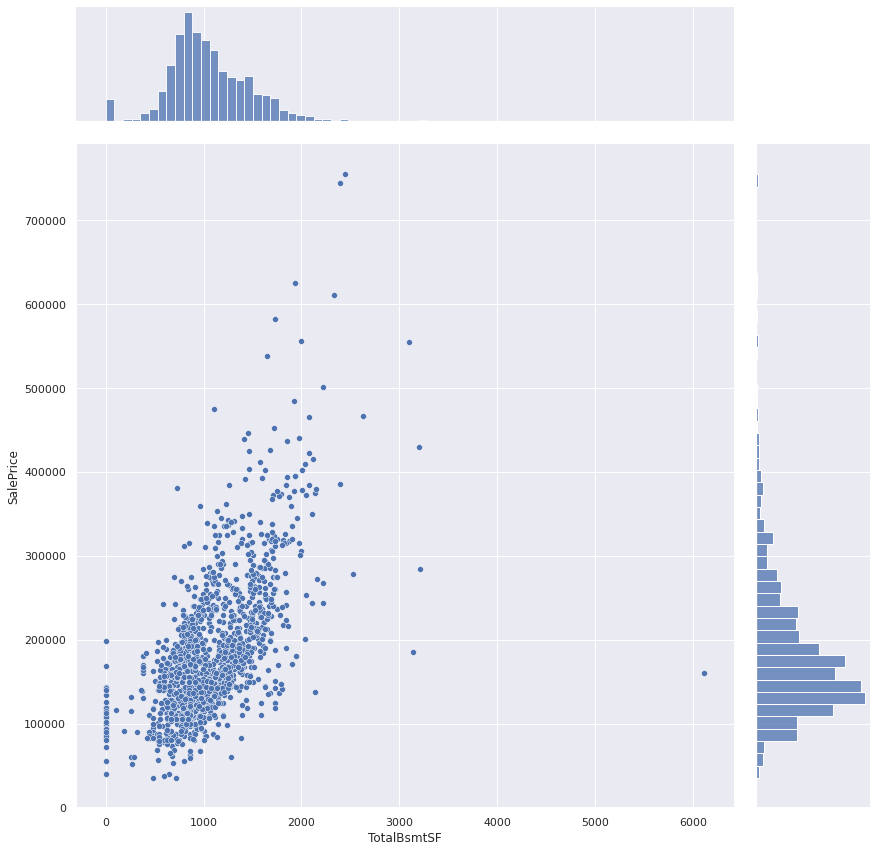

In [ ]:
sb.jointplot(data = houseData, x = 'TotalBsmtSF', y ='SalePrice', height = 12)

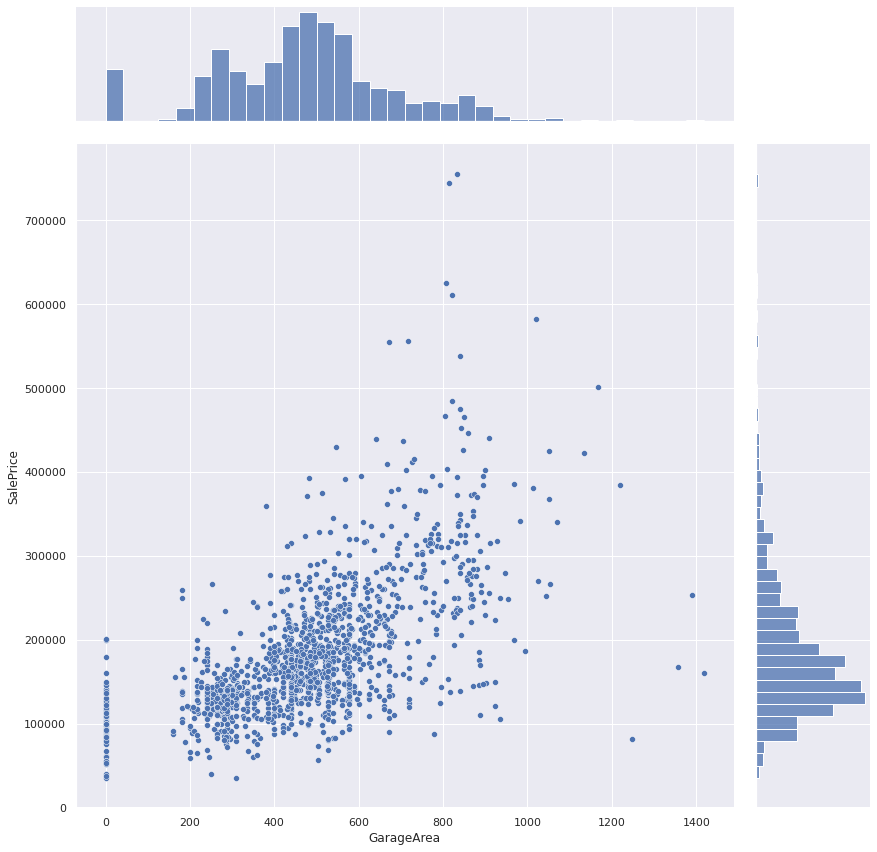

In [ ]:
sb.jointplot(data = houseData, x = 'GarageArea', y = 'SalePrice', height = 12)

In [ ]:
SalePrice_train, SalePrice_test, LotArea_train, LotArea_test = train_test_split(houseData[['SalePrice']], houseData[['LotArea']], test_size=360, train_size=1100, random_state = 42)
TotalBsmtSF_train, TotalBsmtSF_test, GarageArea_train, GarageArea_test = train_test_split(houseData[['TotalBsmtSF']], houseData[['GarageArea']], test_size=360, train_size=1100, random_state = 42)

print('Train set:', SalePrice_train.shape, LotArea_train.shape, TotalBsmtSF_train.shape, GarageArea_train.shape)
print('Test set :', SalePrice_test.shape, LotArea_test.shape, TotalBsmtSF_test.shape, GarageArea_test.shape)

Train set: (1100, 1) (1100, 1) (1100, 1) (1100, 1)
Test set : (360, 1) (360, 1) (360, 1) (360, 1)


In [ ]:
linreg = LinearRegression()

#Predict SalePrice with LotArea

In [ ]:
linreg.fit(LotArea_train, SalePrice_train)

LinearRegression()

In [ ]:
LotArea_c = linreg.intercept_
LotArea_m = linreg.coef_
print('Intercept \t: b = ', c)
print('Coefficients \t: a = ', m)


Intercept 	: b =  [161532.90229731]
Coefficients 	: a =  [[1.87546098]]


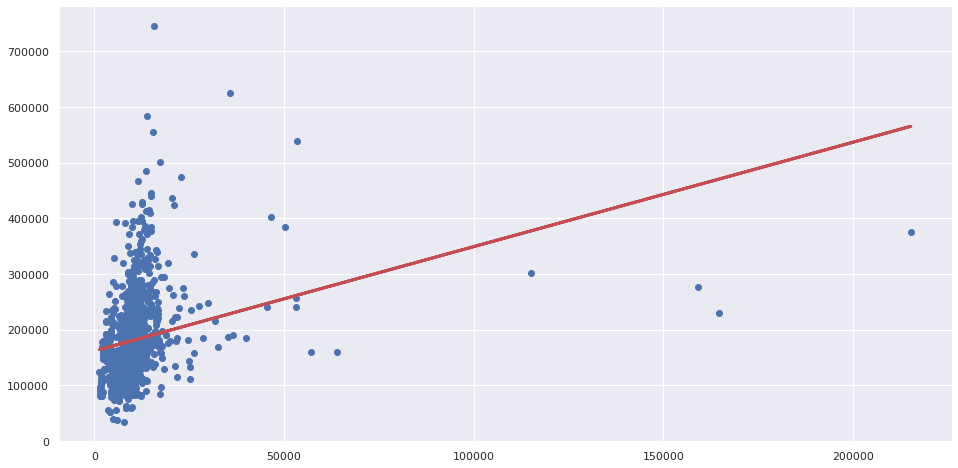

In [ ]:
regline_x = LotArea_train
regline_y = c + m * LotArea_train

f = plt.figure(figsize=(16, 8))
plt.scatter(LotArea_train, SalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

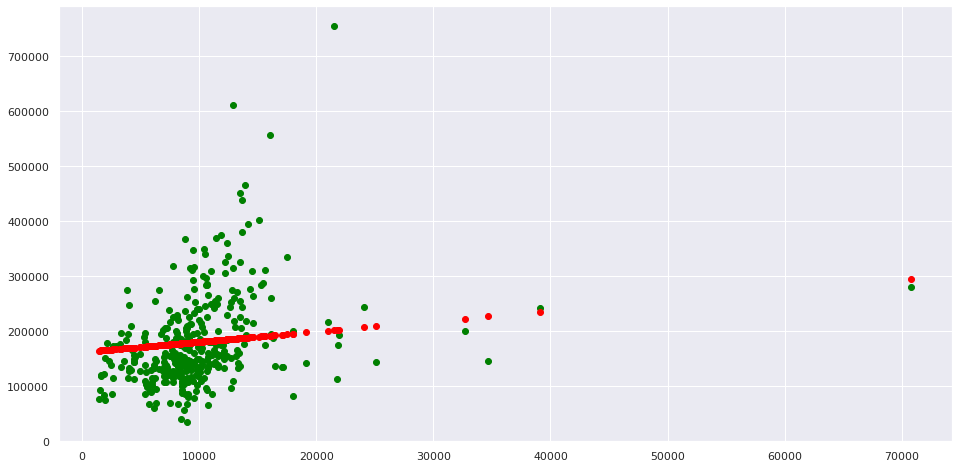

In [ ]:
SalePrice_test_pred = linreg.predict(LotArea_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(LotArea_test, SalePrice_test, color = "green")
plt.scatter(LotArea_test, SalePrice_test_pred, color = "red")
plt.show()

In [ ]:
print("Train Explained Variance (R^2) \t:", linreg.score(LotArea_train, SalePrice_train))
print("Test Explained Variance (R^2) \t:", linreg.score(LotArea_test, SalePrice_test))

Train Explained Variance (R^2) 	: 0.07092595947940383
Test Explained Variance (R^2) 	: 0.06219075766848703


#Predict SalePrice with TotalBsmtSF

In [ ]:
linreg.fit(TotalBsmtSF_train, SalePrice_train)

LinearRegression()

In [ ]:
TotalBsmtSF_c = linreg.intercept_
TotalBsmtSF_m = linreg.coef_
print('Intercept \t: b = ', TotalBsmtSF_c)
print('Coefficients \t: a = ', TotalBsmtSF_m)

Intercept 	: b =  [71186.61026534]
Coefficients 	: a =  [[104.23871406]]


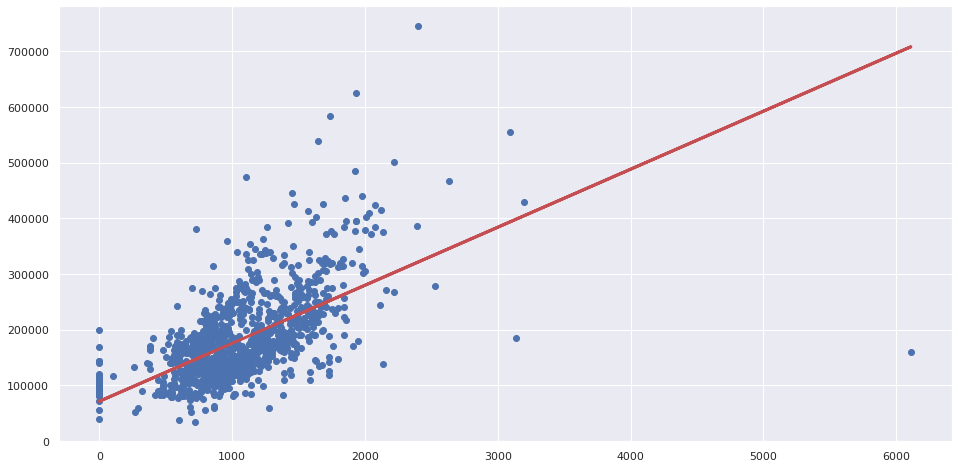

In [ ]:
regline_x = TotalBsmtSF_train
regline_y = TotalBsmtSF_c + TotalBsmtSF_m* TotalBsmtSF_train

f = plt.figure(figsize=(16, 8))
plt.scatter(TotalBsmtSF_train, SalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

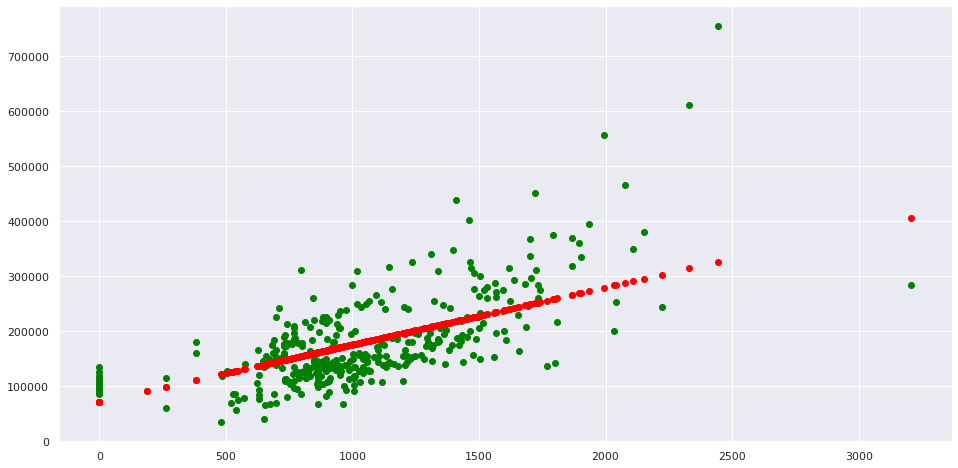

In [ ]:
SalePrice_test_pred = linreg.predict(TotalBsmtSF_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(TotalBsmtSF_test, SalePrice_test, color = "green")
plt.scatter(TotalBsmtSF_test, SalePrice_test_pred, color = "red")
plt.show()

In [ ]:
print("Train Explained Variance (R^2) \t:", linreg.score(TotalBsmtSF_train, SalePrice_train))
print("Test Explained Variance (R^2) \t:", linreg.score(TotalBsmtSF_test, SalePrice_test))

Train Explained Variance (R^2) 	: 0.35204124502272816
Test Explained Variance (R^2) 	: 0.4344631553943451


#Predict SalePrice use GarageArea

In [ ]:
linreg.fit(GarageArea_train, SalePrice_train)

LinearRegression()

In [ ]:
GarageArea_c = linreg.intercept_
GarageArea_m = linreg.coef_
print('Intercept \t: b = ', GarageArea_c)
print('Coefficients \t: a = ', GarageArea_m)

Intercept 	: b =  [71713.58960347]
Coefficients 	: a =  [[230.40109947]]


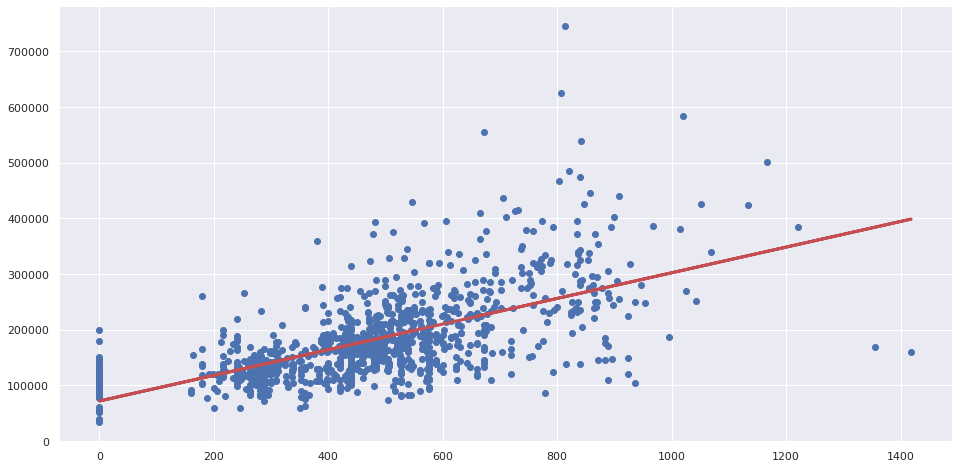

In [ ]:
regline_x = GarageArea_train
regline_y = GarageArea_c + GarageArea_m * GarageArea_train

f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_train, SalePrice_train)
plt.plot(regline_x.to_numpy(), regline_y.to_numpy(), 'r-', linewidth = 3)
plt.show()

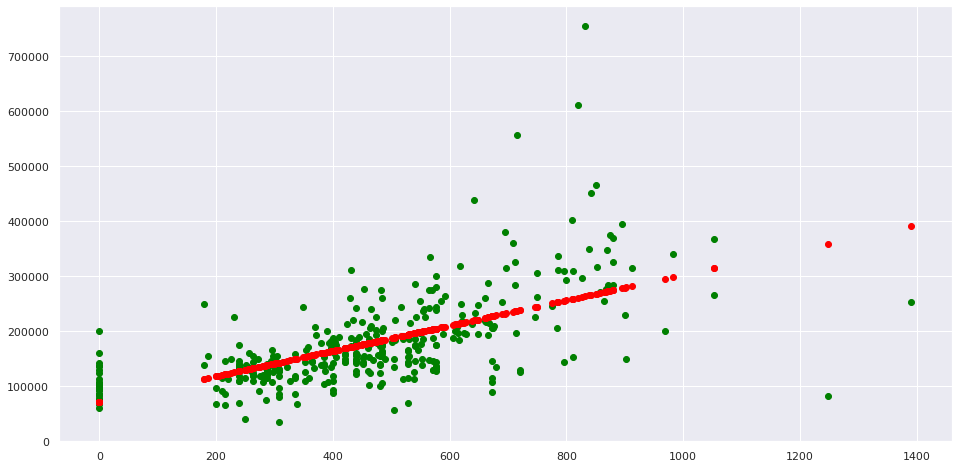

In [75]:
SalePrice_test_pred = linreg.predict(GarageArea_test)

f = plt.figure(figsize=(16, 8))
plt.scatter(GarageArea_test, SalePrice_test, color = "green")
plt.scatter(GarageArea_test, SalePrice_test_pred, color = "red")
plt.show()

In [76]:
print("Train Explained Variance (R^2) \t:", linreg.score(GarageArea_train, SalePrice_train))
print("Test Explained Variance (R^2) \t:", linreg.score(GarageArea_test, SalePrice_test))

Train Explained Variance (R^2) 	: 0.3872104847769364
Test Explained Variance (R^2) 	: 0.3917284093649577
